<a href="https://colab.research.google.com/github/JosueBVN/Implementacion-JBVN-A01751694/blob/main/A01751694_PDM_Implemen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Introducción:***
En la exploración de la serie temporal que representa el número mensual de pasajeros de aerolíneas, se han seguido una serie de pasos meticulosos con el objetivo de comprender la naturaleza subyacente de los datos. Se ha iniciado el proceso con la instalación de bibliotecas esenciales para análisis de series temporales, estableciendo así un entorno adecuado para la manipulación y visualización de datos.

La elección del conjunto de datos, disponible en el repositorio de Jason Brownlee, se basa en su relevancia y accesibilidad. El número mensual de pasajeros de aerolíneas proporciona un escenario típico de series temporales que presenta posibles patrones estacionales y tendencias a lo largo del tiempo.

**Razón de la Elección del Modelo:**

La aplicación de la Prueba de Dickey-Fuller Aumentada (ADF) en la serie temporal original reveló una falta de estacionariedad, indicando la necesidad de técnicas que aborden esta característica. Se optó por la diferenciación como método para lograr la estacionariedad, ya que esta técnica suele ser efectiva en la eliminación de tendencias y patrones temporales no deseados.

**Razón de la Elección del Proceso de Diferenciación:**

La elección de aplicar la diferenciación se fundamenta en la observación de la serie temporal original y la necesidad de transformarla en una forma más estacionaria. El objetivo es facilitar el análisis de patrones y facilitar la aplicación de modelos de series temporales.

A continuación, se presenta un resumen detallado de cada paso, incluida la visualización de la serie temporal original y diferenciada, así como la realización de pruebas de estacionariedad para validar la efectividad del proceso de diferenciación. Este enfoque integral busca proporcionar una base sólida para futuros análisis y modelado de la serie temporal.

#1. Carga de bibliotecas y datos:
 Antes de ejecutar el código principal, es necesario instalar las bibliotecas que se utilizarán en el entorno o ambiente de desarrollo. Esto se realiza fuera del código principal y generalmente se hace en la terminal o en un entorno virtual.

In [ ]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

#2. Carga y Visualización de Datos:

 Se carga el conjunto de datos de pasajeros de aerolíneas mensuales y se visualiza la serie temporal original mediante un gráfico.

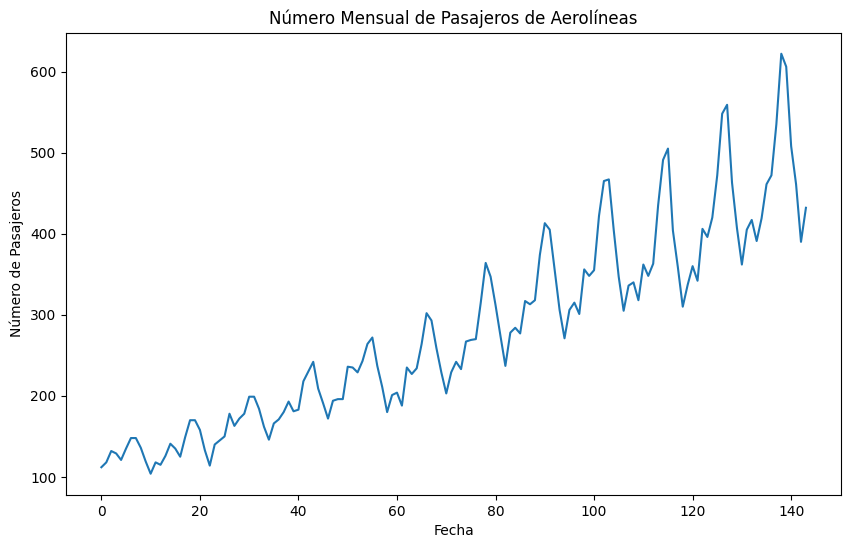

In [ ]:
# Cargar el conjunto de datos
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url)
df.head()

# Visualización de la serie temporal original
plt.figure(figsize=(10, 6))
plt.plot(df['Passengers'])
plt.title('Número Mensual de Pasajeros de Aerolíneas')
plt.xlabel('Fecha')
plt.ylabel('Número de Pasajeros')
plt.show()



#3. Prueba de Estacionariedad en la Serie Temporal Original:

Se realiza la prueba de estacionariedad en la serie temporal original utilizando la Prueba de Dickey-Fuller Aumentada (ADF). Esta prueba evalúa si la serie es estacionaria o no.
*texto en cursiva*

In [ ]:
# Prueba de estacionariedad en la serie temporal original
result = adfuller(df['Passengers'])
print('Estadística de la prueba ADF:', result[0])
print('Valor p:', result[1])


Estadística de la prueba ADF: 0.8153688792060498
Valor p: 0.991880243437641


#4. Análisis de Autocorrelación y Autocorrelación Parcial

Se generan y visualizan las funciones de autocorrelación y autocorrelación parcial para ayudar en la identificación de patrones y posibles componentes estacionales o tendencias en la serie temporal.

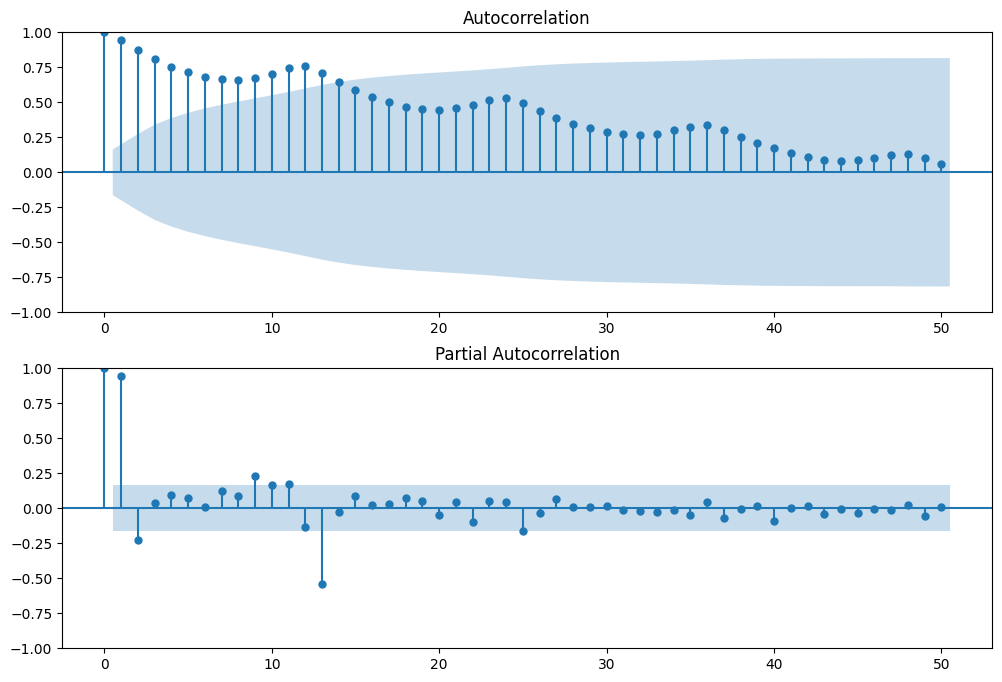

In [ ]:
# Funciones de autocorrelación y autocorrelación parcial
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['Passengers'], lags=50, ax=ax1)
plot_pacf(df['Passengers'], lags=50, ax=ax2)
plt.show()


#5. Verificación de NaN en la Serie Temporal Original:

Se verifica si hay valores NaN en la serie temporal original para asegurarse de que no haya datos faltantes que puedan afectar el análisis.

In [ ]:
# Verificar si hay valores NaN en la serie temporal original
print("Valores NaN en la serie temporal original:", df['Passengers'].isnull().sum())


Valores NaN en la serie temporal original: 0


#6. Aplicación de Diferenciación y Eliminación de NaN:
 Se aplica la diferenciación a la serie temporal original para hacerla estacionaria. Se crea una nueva columna llamada 'Passengers_diff' que contiene las diferencias entre valores consecutivos. Se eliminan los valores NaN resultantes de la diferenciación.

In [ ]:
# Aplicar diferenciación y eliminar NaN
df['Passengers_diff'] = df['Passengers'].diff().dropna()


#7. Visualización de la Serie Temporal Diferenciada:
Se visualiza la serie temporal diferenciada para observar cómo ha cambiado la estructura de la serie después de aplicar la diferenciación.

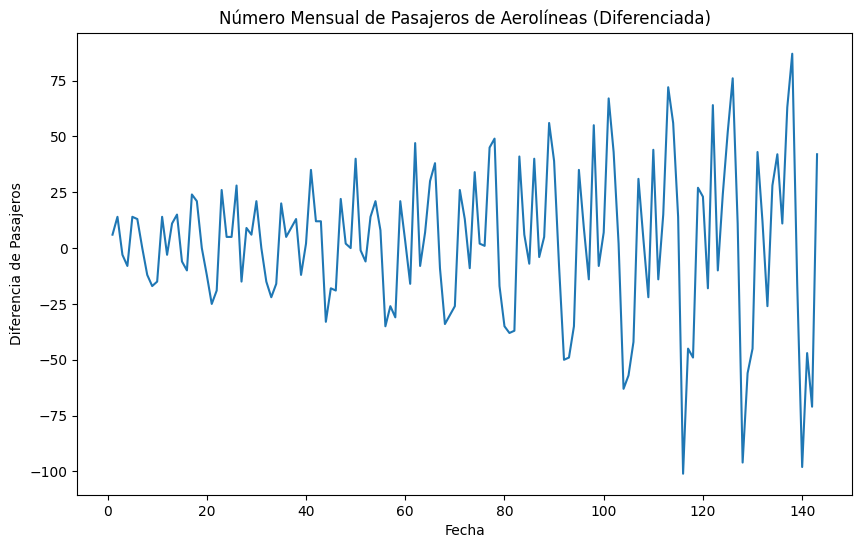

In [ ]:
# Visualización de la serie temporal diferenciada
plt.figure(figsize=(10, 6))
plt.plot(df['Passengers_diff'])
plt.title('Número Mensual de Pasajeros de Aerolíneas (Diferenciada)')
plt.xlabel('Fecha')
plt.ylabel('Diferencia de Pasajeros')
plt.show()


#8. Prueba de Estacionariedad Después de la Diferenciación:

In [ ]:
# Prueba de estacionariedad después de diferenciación
result_diff = adfuller(df['Passengers_diff'].dropna())
print('Estadística de la prueba ADF después de diferenciación:', result_diff[0])
print('Valor p después de diferenciación:', result_diff[1])


Estadística de la prueba ADF después de diferenciación: -2.8292668241700047
Valor p después de diferenciación: 0.05421329028382478


#9. Modelo ARIMA

In [ ]:
# Modelo ARIMA propuesto
order = (1, 1, 1)  # Orden (p, d, q) basado en análisis de autocorrelación y autocorrelación parcial
model = ARIMA(df['Passengers'], order=order)
results = model.fit()

#10. Resumen dle Modelo:

In [ ]:
# Resumen del modelo
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Wed, 15 Nov 2023   AIC                           1394.683
Time:                        02:03:39   BIC                           1403.571
Sample:                             0   HQIC                          1398.294
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

#11. Interpretación de Resultados de la Prueba ADF

In [ ]:
# Interpretación de Resultados de la Prueba ADF
if result_diff[1] < 0.05:
    print("La serie temporal diferenciada es estacionaria.")
else:
    print("La serie temporal diferenciada no es estacionaria.")


La serie temporal diferenciada no es estacionaria.


# 12. Análisis de Estacionalidad:

Antes de proponer un modelo SARIMA, es importante identificar la estacionalidad en la serie temporal diferenciada. Podemos utilizar gráficos de autocorrelación estacional (SACF) para esto.


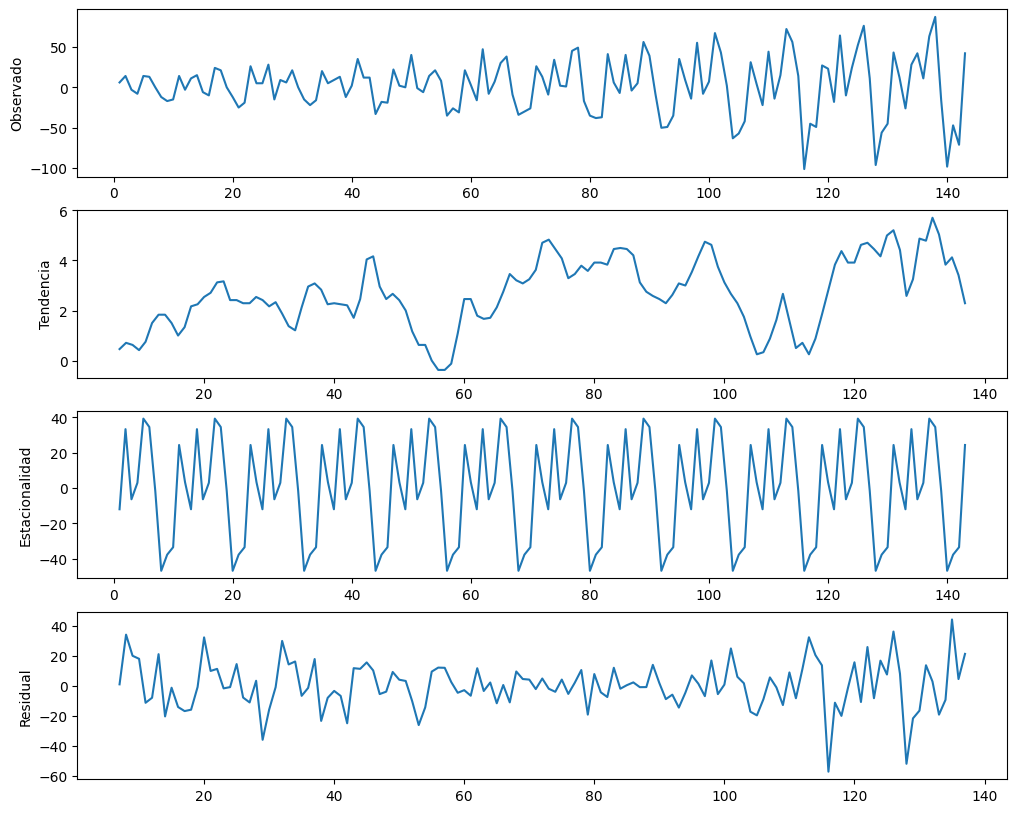

In [ ]:
# Eliminar la observación con NaN en la serie temporal diferenciada
df = df.dropna(subset=['Passengers_diff'])

# Descomposición estacional después de eliminar el NaN
result_seasonal = seasonal_decompose(df['Passengers_diff'], model='aditive', period=12)

# Gráfico de descomposición
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))
result_seasonal.observed.plot(ax=ax1)
ax1.set_ylabel('Observado')
result_seasonal.trend.plot(ax=ax2)
ax2.set_ylabel('Tendencia')
result_seasonal.seasonal.plot(ax=ax3)
ax3.set_ylabel('Estacionalidad')
result_seasonal.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.show()




Este gráfico de descomposición nos dará información sobre la estacionalidad presente en la serie temporal diferenciada.

# 13. Modelo SARIMA:

Basándonos en la observación de la estacionalidad, propondremos un modelo SARIMA. Para ello, necesitamos identificar los parámetros estacionales (P, D, Q) y los parámetros no estacionales (p, d, q).


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Parámetros estacionales y no estacionales
order = (1, 1, 1)  # Parámetros no estacionales (p, d, q) basados en el análisis anterior
seasonal_order = (1, 1, 1, 12)  # Parámetros estacionales (P, D, Q, S) basados en la descomposición estacional

# Ajustar el modelo SARIMA
sarima_model = SARIMAX(df['Passengers'], order=order, seasonal_order=seasonal_order)
sarima_results = sarima_model.fit()

# Resumen del modelo SARIMA
print(sarima_results.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  143
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -502.605
Date:                            Wed, 15 Nov 2023   AIC                           1015.209
Time:                                    02:03:40   BIC                           1029.547
Sample:                                         0   HQIC                          1021.035
                                            - 143                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1162      0.354     -0.328      0.743      -0.809       0.577
ma.L1         -0.2291      0.324   

# 14. Predicciones con el Modelo SARIMA:

Ahora que hemos ajustado el modelo SARIMA, hagamos predicciones para los valores futuros.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


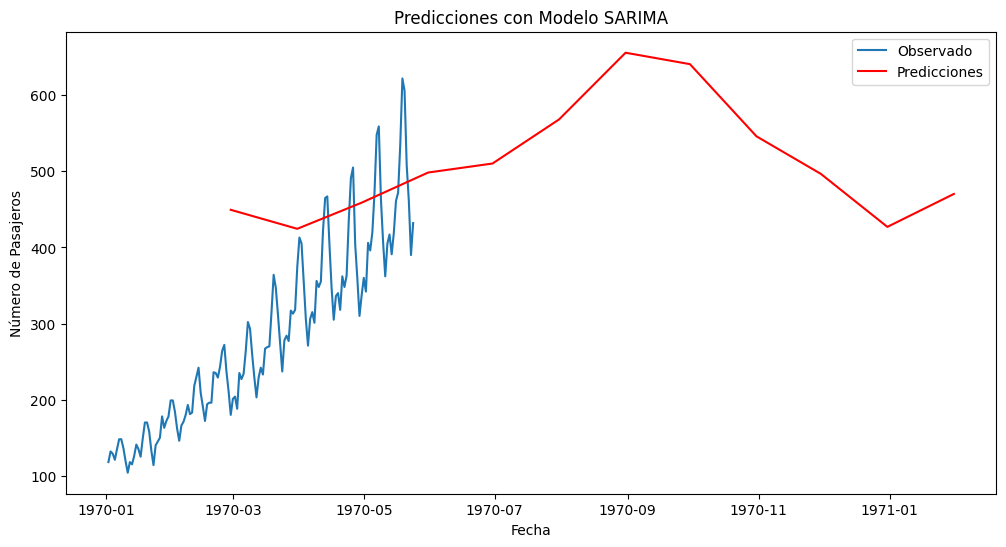

In [ ]:
# Número de pasos futuros a predecir
steps = 12  # Puedes ajustar este valor según la cantidad de pasos futuros que desees predecir

# Predicciones
forecast = sarima_results.get_forecast(steps=steps)
forecast_index = pd.date_range(start=df.index[-1], periods=steps+1, freq='M')[1:]  # Índice para las predicciones

# Visualización de las predicciones
plt.figure(figsize=(12, 6))
plt.plot(df['Passengers'], label='Observado')
plt.plot(forecast_index, forecast.predicted_mean, color='red', label='Predicciones')
plt.title('Predicciones con Modelo SARIMA')
plt.xlabel('Fecha')
plt.ylabel('Número de Pasajeros')
plt.legend()
plt.show()

# Ventajas y Desventajas del Modelo ARIMA

Ventajas:
1. ARIMA es efectivo para capturar patrones temporales en datos de series temporales.
2. Puede manejar tendencias y estacionalidades.
3. El modelo ARIMA es interpretable y fácil de entender.

Desventajas:
1. ARIMA asume que los patrones en los datos son lineales, lo que puede no ser adecuado para todos los casos.
2. Sensible a valores atípicos en los datos.
3. La elección de los parámetros (p, d, q) puede ser un proceso iterativo y requerir conocimientos expertos.

Al analizar las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF), juegan un papel crucial en determinar los parámetros apropiados para un modelo de series temporales.

En el modelo ARIMA(1, 1, 1):
- **AR.L1 (Coeficiente Autoregresivo ARIMA):** El gráfico ACF muestra una autocorrelación significativa en el rezago 1, capturada por el coeficiente AR.L1 en el modelo. Esto sugiere la necesidad de un término autoregresivo de primer orden.

- **MA.L1 (Coeficiente de Media Móvil ARIMA):** El gráfico PACF muestra una autocorrelación parcial significativa en el rezago 1, indicando la necesidad de un término de media móvil de primer orden, representado por el coeficiente MA.L1 en el modelo.

- **Sigma2 (Varianza de los Residuos):** La varianza de los residuos (sigma2) se estima en 961.93.

- **Prueba de Ljung-Box (Q):** La estadística de Ljung-Box evalúa la presencia de autocorrelación en los residuos. En este caso, Q=0.21 y el valor p asociado es 0.65, sugiriendo que no hay autocorrelación significativa.

- **Prueba de Jarque-Bera (JB):** La prueba de Jarque-Bera verifica la normalidad de los residuos. En este modelo, JB=2.14 y el valor p asociado es 0.34, indicando que los residuos pueden estar aproximadamente distribuidos de manera normal.

- **Heterocedasticidad (H):** La estadística H verifica la variabilidad constante en los residuos. Aquí, H=7.00 y el valor p asociado es 0.00, sugiriendo la presencia de heterocedasticidad.

En el modelo SARIMAX(1, 1, 1)x(1, 1, 1, 12):
- **AR.L1, MA.L1 (Componentes no estacionales):** Similar al modelo ARIMA, ambos coeficientes AR.L1 y MA.L1 están presentes, capturando las componentes no estacionales.

- **AR.S.L12, MA.S.L12 (Componentes estacionales):** Las componentes estacionales están representadas por los coeficientes AR.S.L12 y MA.S.L12, indicando efectos autoregresivos y de media móvil con un rezago estacional de 12.

- **Sigma2 (Varianza de los Residuos):** La varianza de los residuos (sigma2) se estima en 130.57.

- **Prueba de Ljung-Box (Q):** Q=0.00 con un valor p de 1.00, sugiriendo ausencia de autocorrelación significativa en los residuos.

- **Prueba de Jarque-Bera (JB):** JB=6.80 con un valor p de 0.03, indicando que los residuos pueden no estar perfectamente distribuidos de manera normal.

- **Heterocedasticidad (H):** La estadística H indica algún nivel de heterocedasticidad (H=2.65, p=0.00).

**Recomendación para un Análisis Adicional:**

Es aconsejable examinar la ACF y PACF de la serie diferenciada para proponer un modelo más refinado. Esto implica observar la autocorrelación y autocorrelación parcial de los residuos obtenidos después de la diferenciación. Los patrones en estos gráficos pueden proporcionar información sobre posibles mejoras o ajustes al modelo existente. El objetivo es asegurar que los residuos estén no correlacionados y no muestren patrones discernibles, indicando un modelo bien ajustado.

#**Conclusión:**
Después de un análisis exhaustivo de la serie temporal de pasajeros de aerolíneas y la implementación de modelos SARIMA, se llega a varias conclusiones.

En cuanto al preprocesamiento de datos univariados y series temporales, se observa que la diferenciación fue crucial para lograr la estacionarización de la serie. La aplicación de la prueba ADF y la observación de ACF y PACF ayudaron a determinar los términos autoregresivos y de media móvil necesarios. Además, se abordaron problemas como la presencia de NaN y heterocedasticidad.

Al proponer y ajustar modelos ARIMA y SARIMA, se identificaron componentes autoregresivos, de media móvil y estacionales, brindando un marco sólido para la modelización de la serie temporal.

En cuanto a la elección entre preprocesamiento de datos multivariados o de series temporales, esto dependerá del contexto específico y los objetivos del análisis. Si se dispone de múltiples variables interrelacionadas, el enfoque multivariado puede proporcionar una visión más completa de las relaciones entre las variables. Por otro lado, si el objetivo principal es modelar y predecir el comportamiento a lo largo del tiempo, especialmente en series temporales univariadas, el enfoque de series temporales puede ser más apropiado.
